In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from scipy.optimize import differential_evolution

In [109]:
data = pd.read_csv("C:\\Users\\ridhi\\Downloads\\heart.csv")

In [110]:
data.head

<bound method NDFrame.head of      Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40   M           ATA        140          289          0     Normal   
1     49   F           NAP        160          180          0     Normal   
2     37   M           ATA        130          283          0         ST   
3     48   F           ASY        138          214          0     Normal   
4     54   M           NAP        150          195          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   
917   38   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease

In [111]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [112]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [113]:
#checking the null values
data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

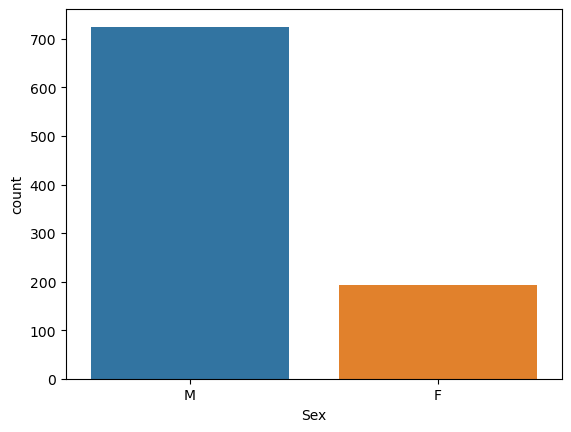

In [114]:
sns.countplot(x='Sex',data=data)
plt.show()

In [115]:
label_encoders={}
categorical_columns=['ChestPainType','RestingECG','Sex','ST_Slope','ExerciseAngina']
for column in categorical_columns: 
    label_encoders[column]=LabelEncoder()
    data[column]=label_encoders[column].fit_transform(data[column])

data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,0,1,132,0,1.2,1,1
914,68,1,0,144,193,1,1,141,0,3.4,1,1
915,57,1,0,130,131,0,1,115,1,1.2,1,1
916,57,0,1,130,236,0,0,174,0,0.0,1,1


In [116]:
label_encoders={}
categorical_columns=['Sex', 'ChestPainType', "RestingBP", 'ExerciseAngina', 'ST_Slope']

for column in categorical_columns: 
    label_encoders[column]=LabelEncoder()

    data[column]=label_encoders[column].fit_transform(data[column])

data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,41,289,0,1,172,0,0.0,2,0
1,49,0,2,55,180,0,1,156,0,1.0,1,1
2,37,1,1,31,283,0,2,98,0,0.0,2,0
3,48,0,0,39,214,0,1,108,1,1.5,1,1
4,54,1,2,49,195,0,1,122,0,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,14,264,0,1,132,0,1.2,1,1
914,68,1,0,45,193,1,1,141,0,3.4,1,1
915,57,1,0,31,131,0,1,115,1,1.2,1,1
916,57,0,1,31,236,0,0,174,0,0.0,1,1


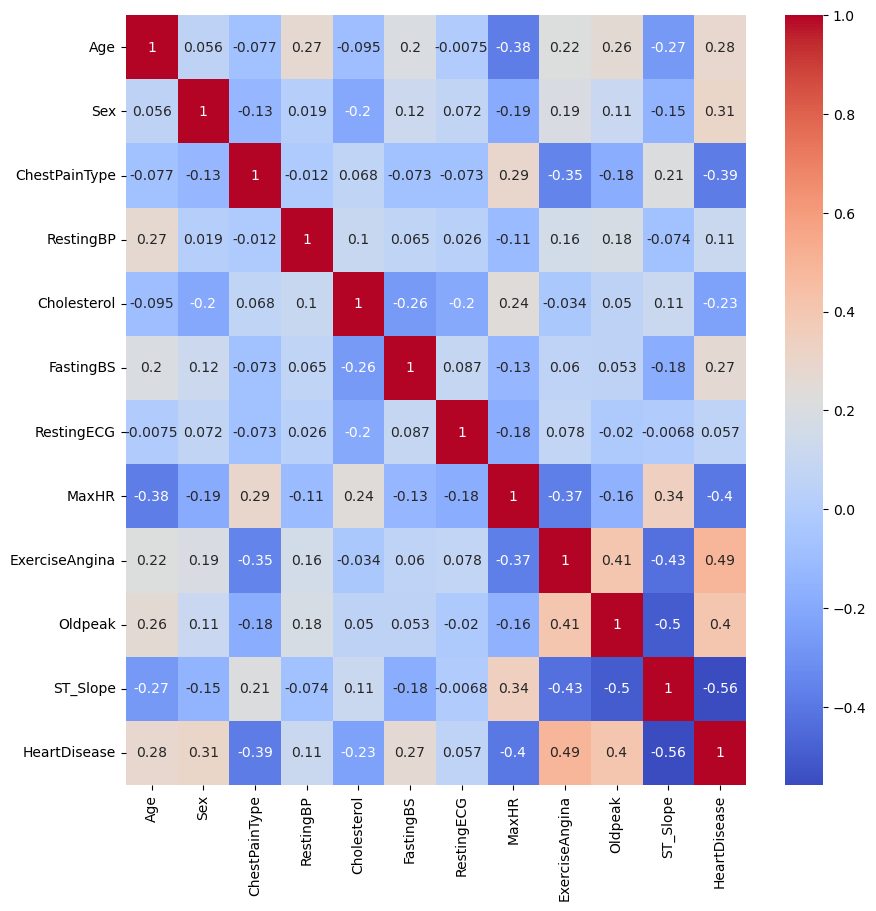

In [117]:
flg=plt.figure(figsize=(10,10))
cor_matrix=data.corr()
sns.heatmap(cor_matrix,annot=True,cmap='coolwarm')
plt.show()

In [118]:
x=data.iloc[:,:-1].values
y=data.iloc[:,-1].values

In [119]:
x

array([[40. ,  1. ,  1. , ...,  0. ,  0. ,  2. ],
       [49. ,  0. ,  2. , ...,  0. ,  1. ,  1. ],
       [37. ,  1. ,  1. , ...,  0. ,  0. ,  2. ],
       ...,
       [57. ,  1. ,  0. , ...,  1. ,  1.2,  1. ],
       [57. ,  0. ,  1. , ...,  0. ,  0. ,  1. ],
       [38. ,  1. ,  2. , ...,  0. ,  0. ,  2. ]])

In [120]:
y

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,

In [121]:
from sklearn.feature_selection import SelectKBest,chi2,mutual_info_classif,f_classif


In [122]:
#FEATURE SELECTION
selector=SelectKBest(f_classif,k=5)
x_new=selector.fit_transform(x,y);
x_new

array([[  1. , 172. ,   0. ,   0. ,   2. ],
       [  2. , 156. ,   0. ,   1. ,   1. ],
       [  1. ,  98. ,   0. ,   0. ,   2. ],
       ...,
       [  0. , 115. ,   1. ,   1.2,   1. ],
       [  1. , 174. ,   0. ,   0. ,   1. ],
       [  2. , 173. ,   0. ,   0. ,   2. ]])

In [123]:
# FEATURE SCALING
from sklearn.preprocessing import StandardScaler

In [124]:
scaler=StandardScaler()
scaled_features=scaler.fit_transform(x_new)
print(scaled_features)

[[ 0.22903206  1.38292822 -0.8235563  -0.83243239  1.05211381]
 [ 1.27505906  0.75415714 -0.8235563   0.10566353 -0.59607813]
 [ 0.22903206 -1.52513802 -0.8235563  -0.83243239  1.05211381]
 ...
 [-0.81699495 -0.85706875  1.21424608  0.29328271 -0.59607813]
 [ 0.22903206  1.4615246  -0.8235563  -0.83243239 -0.59607813]
 [ 1.27505906  1.42222641 -0.8235563  -0.83243239  1.05211381]]


In [125]:
x_train,x_test,y_train,y_test=train_test_split(scaled_features,y,test_size=0.2)

In [126]:
classifiers={
    'LogisticRegression':LogisticRegression(),
    'DecisionTree':DecisionTreeClassifier(),
    'RandomForest':RandomForestClassifier(),
    'Support Vector Machine':SVC(),
    'Naive Bayes':GaussianNB(),
    'K Nearest Neighbor':KNeighborsClassifier()
}

In [127]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,accuracy_score,classification_report
results={}
for name,c in classifiers.items():
    c.fit(x_train,y_train)
    y_pred=c.predict(x_test)
    cm=confusion_matrix(y_test,y_pred)
    print(f"confusion matrix for {name} \n",cm)
    accuracy=accuracy_score(y_test,y_pred)
    results[name]=accuracy
    print(f"Accuracy {accuracy*100:.2f}%")
    print(classification_report(y_test,y_pred))
    print("  ")

confusion matrix for LogisticRegression 
 [[63 18]
 [11 92]]
Accuracy 84.24%
              precision    recall  f1-score   support

           0       0.85      0.78      0.81        81
           1       0.84      0.89      0.86       103

    accuracy                           0.84       184
   macro avg       0.84      0.84      0.84       184
weighted avg       0.84      0.84      0.84       184

  
confusion matrix for DecisionTree 
 [[59 22]
 [21 82]]
Accuracy 76.63%
              precision    recall  f1-score   support

           0       0.74      0.73      0.73        81
           1       0.79      0.80      0.79       103

    accuracy                           0.77       184
   macro avg       0.76      0.76      0.76       184
weighted avg       0.77      0.77      0.77       184

  
confusion matrix for RandomForest 
 [[61 20]
 [16 87]]
Accuracy 80.43%
              precision    recall  f1-score   support

           0       0.79      0.75      0.77        81
           1